**Image Denoising with Convolutional Autoencoders**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Normalize images to [0, 1]

In [ ]:

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Add random noise to images

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to maintain [0, 1] range

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Build the Convolutional Autoencoder Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Autoencoder**

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 615ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 233s 597ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 594ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 221s 564ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 230s 586ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 255s 570ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 223s 569ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 271s 593ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 597ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 233s 597ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 230s 587ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 12

**Evaluate and Visualize Results**

In [ ]:
# Predict denoised images

In [ ]:
denoised_images = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


# Display original, noisy, and denoised images

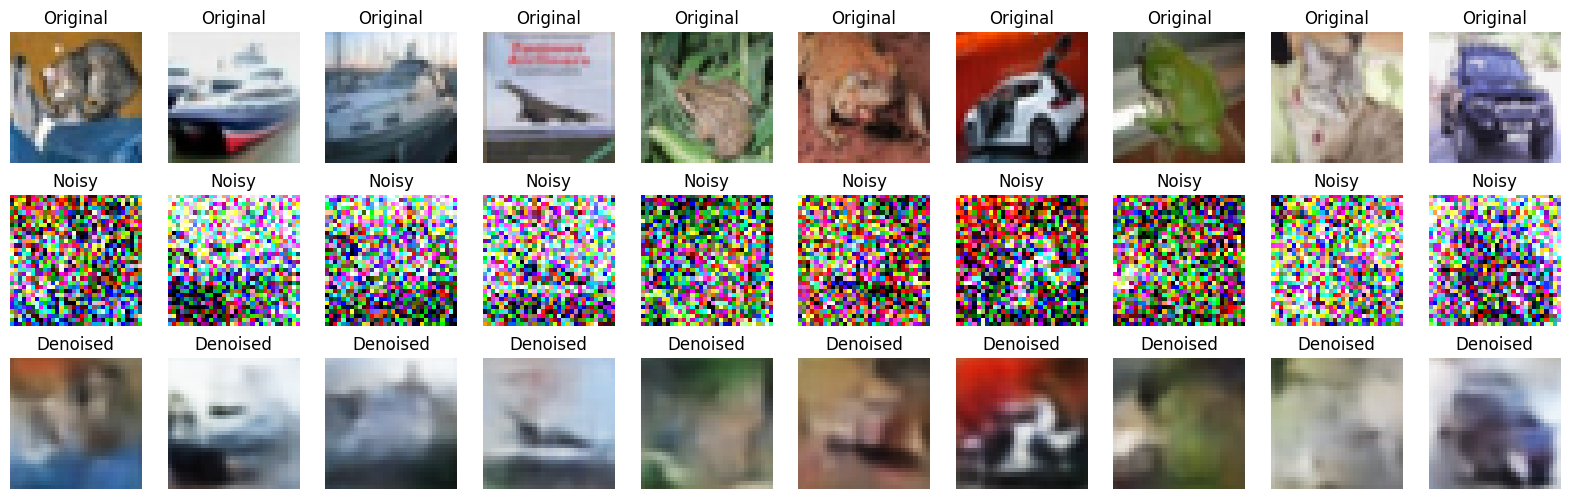

In [ ]:

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.axis('off')
plt.show()


**Performance Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(x_test.flatten(), denoised_images.flatten())
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.009766162373125553


**Peak Signal-to-Noise Ratio (PSNR):**
*Indicates the quality of the denoised images. Higher values denote better quality.*

In [ ]:
import math

def psnr(target, ref):
    mse = np.mean((target - ref) ** 2)
    if mse == 0:
        return 100
    max_pixel = 1.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))

psnr_value = psnr(x_test, denoised_images)
print(f"PSNR: {psnr_value} dB")


PSNR: 20.10276059371349 dB
